<a href="https://colab.research.google.com/github/victorsobottka/bse-thesis-synthetic-data/blob/main/2_2_LLM_Few_Shot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🧠 LLM -  Log Returns - Zero Shot Few Data Approach**

## **🗝️ Get Secrets**

Register on DeepSeek API to get an API Key.

In [ ]:
from google.colab import userdata
DEEPSEEK_API_KEY = userdata.get('DEEPSEEK_API_KEY')

##**🔢 Variable Definition**

In [ ]:
import os

prompt_mode = "zero_shot_few_data"

input_path = "/content/drive/MyDrive/Colab Notebooks/thesis/llm_inputs/nvidia_2020_2021_returns.csv"

# Define output folder and file
folder_output_path = "/content/drive/MyDrive/Colab Notebooks/thesis/llm_outputs"
output_path = os.path.join(folder_output_path, f"llm_{prompt_mode}_output.txt")

file_path_generated = f"{folder_output_path}/llm_{prompt_mode}_generated_log_returns.csv"

# Define system and prompt content as variables
system_content = (
    "You are a financial data simulation assistant. Your task is to generate realistic synthetic financial "
    "time series data based on user instructions. Ensure the format, constraints (such as dates and volatility), "
    "and output structure follow the user's specifications precisely."
)

prompt = (
    "Generate synthetic data simulating the trend of NVIDIA's log return over 100 trading days, starting from 2020-01-01.\n"

    "Below is a sample of real log return prices at the beginning of 2021:\n"

    "1/4/2021,0.0046\n"
    "1/5/2021,0.0219\n"
    "1/6/2021,-0.0609\n"
    "1/7/2021,0.0564\n"
    "1/8/2021,-0.0053\n"
    "1/11/2021,0.0261\n"
    "1/12/2021,-0.0104\n"
    "1/13/2021,0.0037\n"
    "1/14/2021,-0.0247\n"
    "1/15/2021,-0.0262\n"
    "1/19/2021,0.0124\n"
    "1/20/2021,0.0258\n"
    "1/21/2021,0.0368\n"
    "1/22/2021,-0.0109\n"
    "1/25/2021,-0.0044\n"
    "1/26/2021,-0.0163\n"
    "1/27/2021,-0.0396\n"
    "1/28/2021,0.0108\n"
    "1/29/2021,-0.0046\n"
    "2/1/2021,0.0183\n"


    "Log return (logarithmic return) is defined as the natural logarithm of the ratio between the current price and the previous price of a financial asset.\n"
    "The real data has a standard deviation of 0.0327, a skewness of -0.3738, and a kurtosis of 7.6696. The generated data should preserve these distributional properties.\n"
    "Assume that trading only occurs on weekdays (Monday to Friday), and exclude U.S. stock market holidays such as New Year’s Day, Martin Luther King Jr. Day, Presidents’ Day, Good Friday, Memorial Day, Juneteenth, Independence Day, Labor Day, Thanksgiving Day, and Christmas Day.\n"
    "Incorporate realistic daily fluctuations to reflect stock market volatility.\n"
    "Output format: CSV with the following headers — Date,LogReturn.\n"
    "Use the date format: YYYY-MM-DD."
)


## **👨‍💻 Analyze Real Data**

**💾 Connect to Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load Data
df_nvda = pd.read_csv(input_path, skiprows=[1, 2], header=0)
df_nvda.columns = ["Date", "Open", "High", "Low", "Close", "Volume", "Return", "LogReturn"]
df_nvda['Date'] = pd.to_datetime(df_nvda['Date'])

# Filter from 2020-01-01 and order by Date
df_nvda = df_nvda[df_nvda['Date'] >= '2020-01-01'].sort_values('Date')

# Get 100 first days
df_real = df_nvda.head(100)
df_real = df_real.loc[:, ['Date', 'Close', 'LogReturn']]

# Mostrar los datos
print(df_real)


          Date  Close  LogReturn
1   2020-01-02   5.97     0.0186
2   2020-01-03   5.88    -0.0152
3   2020-01-06   5.90     0.0034
4   2020-01-07   5.97     0.0118
5   2020-01-08   5.98     0.0017
..         ...    ...        ...
96  2020-05-19   8.77     0.0057
97  2020-05-20   8.94     0.0192
98  2020-05-21   8.74    -0.0226
99  2020-05-22   8.99     0.0282
100 2020-05-26   8.69    -0.0339

[100 rows x 3 columns]


### **📉 Plot Daily Returns**

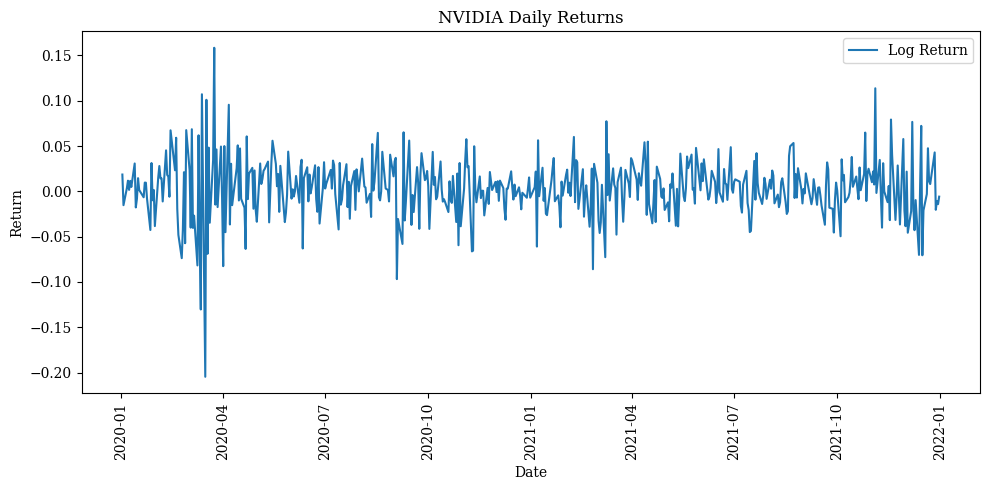

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(10, 5))
#plt.plot(df_nvda['Date'], df_nvda['Return'], label='Return')
plt.plot(df_nvda['Date'], df_nvda['LogReturn'], label='Log Return')
plt.title("NVIDIA Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

### **💹 Real Data Stats**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# Assuming your DataFrame is already loaded and contains a 'LogReturn' column
log_returns = df_nvda['LogReturn'].dropna()

# Compute statistics
mean_val = log_returns.mean()
std_val = log_returns.std()
skew_val = skew(log_returns)
kurt_val = kurtosis(log_returns, fisher=False)  # Use fisher=False to get regular (Pearson) kurtosis

# Display results
print(f"📊 Descriptive statistics of NVIDIA's log returns:")
print(f"Mean: {mean_val:.4f}")
print(f"Standard Deviation: {std_val:.4f}")
print(f"Skewness: {skew_val:.4f}")
print(f"Kurtosis: {kurt_val:.4f}")


📊 Descriptive statistics of NVIDIA's log returns:
Mean: 0.0032
Standard Deviation: 0.0327
Skewness: -0.3738
Kurtosis: 7.6696


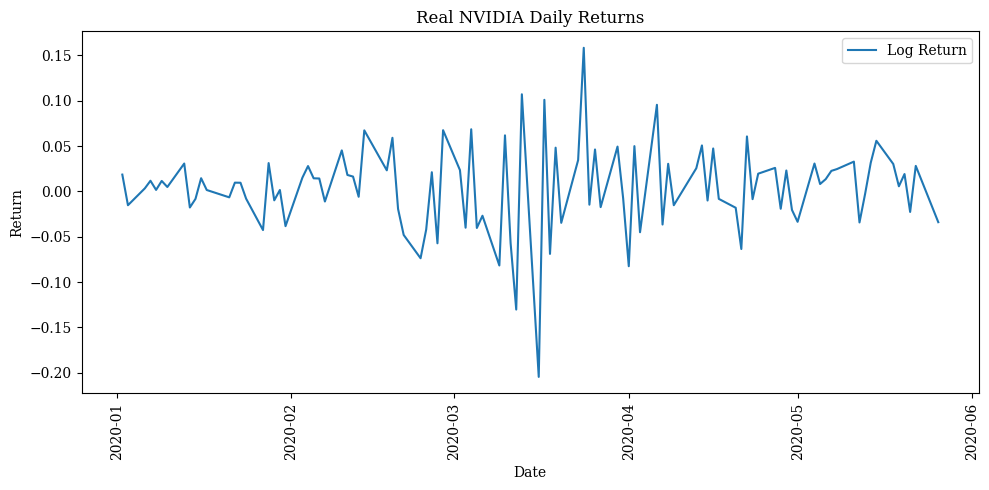

In [ ]:
import matplotlib.pyplot as plt


plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(10, 5))
#plt.plot(df_nvda['Date'], df_nvda['Return'], label='Return')
plt.plot(df_real['Date'], df_real['LogReturn'], label='Log Return')
plt.title("Real NVIDIA Daily Returns")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(False)
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

## **🐋 Calling DeepSeek API**

In [ ]:
import requests



# Prepare the request
url = "https://api.deepseek.com/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {DEEPSEEK_API_KEY}",
    "Content-Type": "application/json"
}
data = {
    "model": "deepseek-chat",
    "messages": [
        {"role": "system", "content": system_content},
        {"role": "user", "content": prompt}
    ],
    "temperature": 0.7
}

# Send the request
response = requests.post(url, headers=headers, json=data)
print(response.json())



{'id': '74579f27-c21f-4824-8bd1-e2ca729be4f7', 'object': 'chat.completion', 'created': 1747588432, 'model': 'deepseek-chat', 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'Here\'s a synthetic dataset simulating NVIDIA\'s log returns over 100 trading days starting from 2020-01-01, preserving the statistical properties of the real data (σ=0.0327, skew=-0.3738, kurtosis=7.6696):\n\n```csv\nDate,LogReturn\n2020-01-01,0.0128\n2020-01-02,-0.0083\n2020-01-03,0.0284\n2020-01-06,-0.0156\n2020-01-07,0.0421\n2020-01-08,-0.0227\n2020-01-09,0.0059\n2020-01-10,-0.0374\n2020-01-13,0.0182\n2020-01-14,-0.0093\n2020-01-15,0.0315\n2020-01-16,-0.0452\n2020-01-17,0.0078\n2020-01-21,-0.0286\n2020-01-22,0.0537\n2020-01-23,-0.0129\n2020-01-24,0.0194\n2020-01-27,-0.0673\n2020-01-28,0.0348\n2020-01-29,-0.0115\n2020-01-30,0.0276\n2020-01-31,-0.0392\n2020-02-03,0.0157\n2020-02-04,-0.0084\n2020-02-05,0.0482\n2020-02-06,-0.0175\n2020-02-07,0.0039\n2020-02-10,-0.0241\n2020-02-11,0.0367\n2020-0

### **🛜 Getting the Response**

In [ ]:
import os
from pathlib import Path



# Create folder if it doesn't exist
Path(folder_output_path).mkdir(parents=True, exist_ok=True)

# Handle API response
if response.status_code == 200:
    result = response.json()
    answer = result['choices'][0]['message']['content']

    # Save to file
    with open(output_path, "w", encoding="utf-8") as f:
        f.write(answer)

    print(f"✅ File saved to: {output_path}")
else:
    print(f"❌ Error {response.status_code}:")
    print(response.text)



✅ File saved to: /content/drive/MyDrive/Colab Notebooks/thesis/llm_outputs/llm_zero_shot_few_data_output.txt


### **📃Get CSV from the Response**

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

csv_text = ""

if response.status_code == 200:
    content = response.json()["choices"][0]["message"]["content"]
    # Extract the CSV content inside triple backticks ```csv ... ```
    match = re.search(r"```csv\s+(.*?)```", content, re.DOTALL)
    if match:
        csv_text = match.group(1).strip()
        # print(csv_text)

    else:
        print("CSV block not found.")
else:
    print(f"Error {response.status_code}:")
    print(response.text)


df_generated = pd.read_csv(StringIO(csv_text))
df_generated['Date'] = pd.to_datetime(df_generated['Date'])
df_generated = df_generated.head(100)
print(df_generated)

         Date  LogReturn
0  2020-01-01     0.0128
1  2020-01-02    -0.0083
2  2020-01-03     0.0284
3  2020-01-06    -0.0156
4  2020-01-07     0.0421
..        ...        ...
95 2020-05-18    -0.0218
96 2020-05-19     0.0372
97 2020-05-20    -0.0135
98 2020-05-21     0.0249
99 2020-05-22    -0.0197

[100 rows x 2 columns]


## **🌍 Compare with real data**


df_real = df_nvda.head(number_of_rows)
df_real['Date'] = pd.to_datetime(df_real['Date'])
df_real = df_real[(df_real['Date'].dt.year == 2020)]
df_real = df_real.head(100)
df_real.head()


In [ ]:
df_real = df_nvda.copy().head(100)
df_synthetic = df_generated

In [ ]:
df_synthetic.to_csv(file_path_generated, index=False)

print(f"Generated data saved to: {file_path_generated}")

Generated data saved to: /content/drive/MyDrive/Colab Notebooks/thesis/llm_outputs/llm_zero_shot_few_data_generated_log_returns.csv


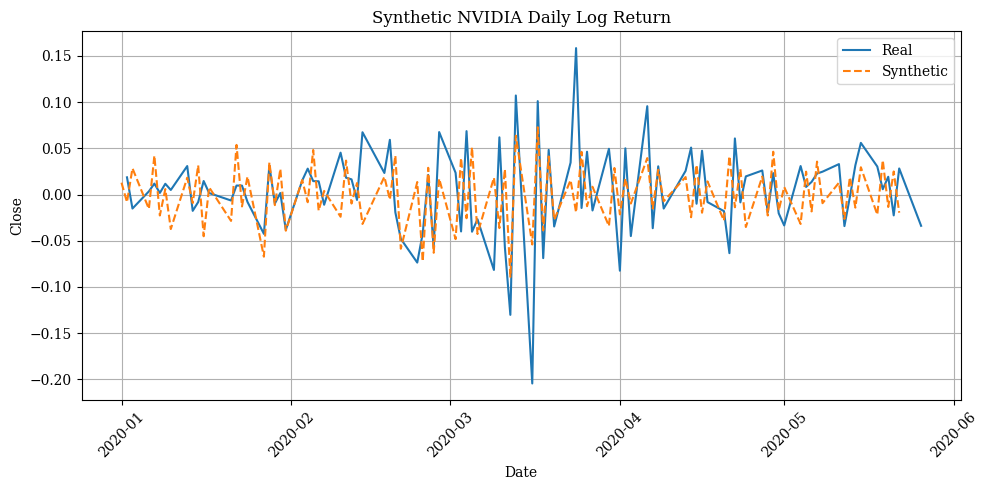

In [ ]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_real['Date'], df_real['LogReturn'], label='Real')
plt.plot(df_synthetic['Date'], df_synthetic['LogReturn'], linestyle="--",  label='Synthetic')
plt.title("Synthetic NVIDIA Daily Log Return")
plt.xlabel("Date")
plt.ylabel("Close")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# Add legend
plt.legend()
plt.savefig(f"/content/drive/MyDrive/Colab Notebooks/thesis/llm_outputs/llm_{prompt_mode}_daily_logreturn.png", dpi=300, bbox_inches='tight')

plt.show()





### **📃Final Report**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.dates as mdates
import pandas as pd
from scipy import stats
import sys

def plot_and_analyze(sequences, synthetic_data):
    """
    Compares real vs. synthetic financial time series with:
    - Return distribution plots
    - Price series comparison
    - Statistical summary and tests

    Parameters:
    - sequences: DataFrame with 'Date' and 'LogReturn' for real data
    - synthetic_data: DataFrame with 'Date' and 'LogReturn' for synthetic data
    """

    # 1. Extract sequences
    real_returns = sequences['LogReturn'].to_numpy().flatten()
    synthetic_returns = synthetic_data['LogReturn'].to_numpy().flatten()

    real_dates = pd.to_datetime(sequences['Date'])
    synthetic_dates = pd.to_datetime(synthetic_data['Date'])

    # 2. Convert log returns to price series
    def returns_to_prices(returns):
        log_prices = np.cumsum(returns)
        return np.exp(log_prices) * 100  # Starting price = 100

    real_prices = returns_to_prices(real_returns)
    synthetic_prices = returns_to_prices(synthetic_returns)

    # 3. Combine into one DataFrame for plotting
    df = pd.DataFrame({
        'Returns': np.concatenate([real_returns, synthetic_returns]),
        'Prices': np.concatenate([real_prices, synthetic_prices]),
        'Type': ['Real']*len(real_returns) + ['Synthetic']*len(synthetic_returns),
        'Date': np.concatenate([real_dates[:len(real_returns)], synthetic_dates[:len(synthetic_returns)]])
    })

    # 4. Generate plots
    plt.figure(figsize=(15, 10))

    # Plot 1: Histogram of returns
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='Returns', hue='Type', kde=True, bins=30, alpha=0.6,
                 palette=['#1f77b4', '#ff7f0e'])
    plt.title('Return Distributions')
    plt.xlabel('Log Returns')
    plt.ylabel('Count')

    # Plot 2: Boxplot of returns
    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x='Type', y='Returns', palette=['#1f77b4', '#ff7f0e'])
    plt.title('Return Distributions (Boxplot)')
    plt.ylabel('Log Returns')

    # Plot 3: Price series
    plt.subplot(2, 2, 3)
    plt.plot(df[df['Type'] == 'Real']['Date'], df[df['Type'] == 'Real']['Prices'],
             label='Real', color='#1f77b4')
    plt.plot(df[df['Type'] == 'Synthetic']['Date'], df[df['Type'] == 'Synthetic']['Prices'],
             label='Synthetic', linestyle='--', color='#ff7f0e')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gcf().autofmt_xdate()
    plt.title('Price Series Comparison')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)

    # Plot 4: Histogram of prices
    plt.subplot(2, 2, 4)
    sns.histplot(data=df, x='Prices', hue='Type', kde=True, bins=30, alpha=0.6,
                 palette=['#1f77b4', '#ff7f0e'])
    plt.title('Price Distributions')
    plt.xlabel('Price ($)')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.savefig(f"/content/drive/MyDrive/Colab Notebooks/thesis/llm_outputs/llm_{prompt_mode}_analysis.png", dpi=300, bbox_inches='tight')

    plt.show()




    # 5. Summary statistics and tests


    class Tee:
        def __init__(self, *streams):
            self.streams = streams
        def write(self, data):
            for s in self.streams:
                s.write(data)
        def flush(self):
            for s in self.streams:
                s.flush()

    # Redirect both stdout and file
    output_path = f"/content/drive/MyDrive/Colab Notebooks/thesis/llm_outputs/llm_{prompt_mode}_analysis_output.txt"

    with open(output_path, "w", encoding="utf-8") as f:
        original_stdout = sys.stdout
        sys.stdout = Tee(sys.stdout, f)  # Print to both

        print("\n" + "="*80)
        print("BASIC STATISTICS COMPARISON")
        print("="*80)
        stats_df = pd.DataFrame({
            'Real Returns': df[df['Type']=='Real']['Returns'].describe(),
            'Synthetic Returns': df[df['Type']=='Synthetic']['Returns'].describe()
        })
        print(stats_df)

        print("\n" + "="*80)
        print("STATISTICAL TESTS")
        print("="*80)

        # Kolmogorov–Smirnov test
        ks_stat, ks_p = stats.ks_2samp(
            df[df['Type'] == 'Real']['Returns'],
            df[df['Type'] == 'Synthetic']['Returns']
        )
        print(f"\nKolmogorov-Smirnov Test:")
        print(f"  Statistic: {ks_stat:.4f}")
        print(f"  p-value: {ks_p:.4f}")

        # Welch's t-test
        t_stat, t_p = stats.ttest_ind(
            df[df['Type'] == 'Real']['Returns'],
            df[df['Type'] == 'Synthetic']['Returns'],
            equal_var=False
        )
        print(f"\nT-test (Welch's):")
        print(f"  Statistic: {t_stat:.4f}")
        print(f"  p-value: {t_p:.4f}")

        sys.stdout = original_stdout  # Restore original stdout







<ipython-input-51-d02da9f2b019>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='Returns', palette=['#1f77b4', '#ff7f0e'])


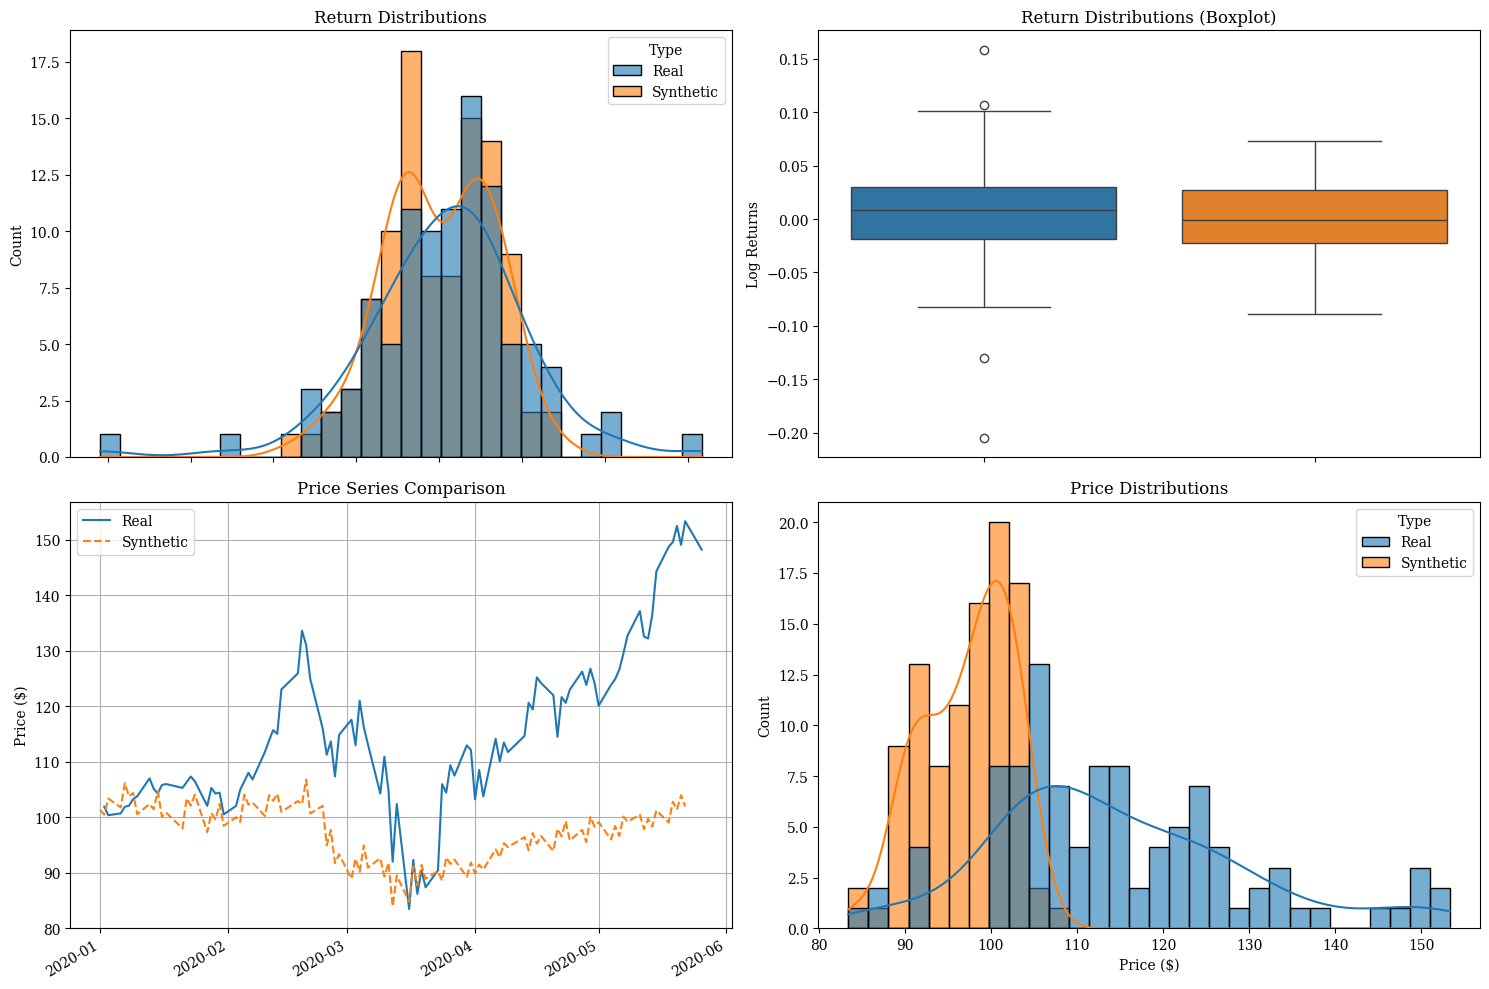


BASIC STATISTICS COMPARISON
       Real Returns  Synthetic Returns
count    100.000000         100.000000
mean       0.003936           0.000191
std        0.048463           0.032820
min       -0.204600          -0.089200
25%       -0.019150          -0.022700
50%        0.008900          -0.000850
75%        0.030350           0.027525
max        0.158500           0.072800

STATISTICAL TESTS

Kolmogorov-Smirnov Test:
  Statistic: 0.1200
  p-value: 0.4695

T-test (Welch's):
  Statistic: 0.6398
  p-value: 0.5231


In [ ]:
plot_and_analyze(
    df_real,
    df_generated
)
